In [1]:
# !pip install stopwords

In [2]:
# pip install wordcloud

In [3]:
# !pip install requests beautifulsoup4

In [4]:
# !pip install nltk

In [5]:
# https://www.bcentral.cl/inicio

In [6]:
import requests
from bs4 import BeautifulSoup

# URL de la página web que deseas hacer scraping
url = 'https://www.bcentral.cl/inicio'

# Realizar una petición GET a la página web
response = requests.get(url)

# Verificar que la petición fue exitosa (código de estado HTTP 200)
if response.status_code == 200:
    # Parsear el contenido HTML de la página web usando BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extraer el título de la página
    title = soup.title.text  # .text extrae el texto del elemento
    
    print("Título de la página:", title)
else:
    print("Error al acceder a la página:", response.status_code)


Título de la página: Inicio - Banco Central de Chile


In [7]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bcentral.cl/inicio'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extraer el título de la página
    title = soup.title.text
    print("Título de la página:", title)
    
    # Extraer todos los enlaces de la página
    links = soup.find_all('a')  # Encuentra todos los elementos <a>
    for link in links:
        href = link.get('href')  # Obtiene el atributo href de cada enlace
        if href:
            print(href)
else:
    print("Error al acceder a la página:", response.status_code)


Título de la página: Inicio - Banco Central de Chile
#main-content
#0
#0
#0
/c/portal/update_language?p_l_id=3297165&redirect=%2Finicio&languageId=en_US
https://www.bcentral.cl/web/banco-central
#;
https://www.bcentral.cl/web/banco-central/columna_1
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo/funciones-del-banco
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo/personas
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo/historia
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo/planificacion-estrategica
https://www.bcentral.cl/contenido/-/detalle/memoria-anual-integrada_2023
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo/evaluaciones-externas
https://www.bcentral.cl/web/banco-central/el-banco/gobierno-corporativo/relaciones-internacionales
https://www.bcentral.cl/web/banco-central/el-banco/relacion-

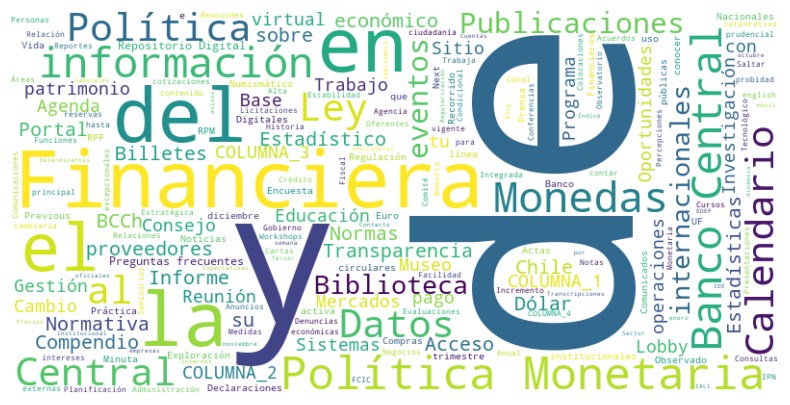

In [8]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# URL de la página web que deseas hacer scraping
url = 'https://www.bcentral.cl/inicio'
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extraer todos los textos de enlaces de la página
    links_text = ' '.join(link.text for link in soup.find_all('a') if link.text)
    
    # Generar la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(links_text)
    
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("Error al acceder a la página:", response.status_code)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Diego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


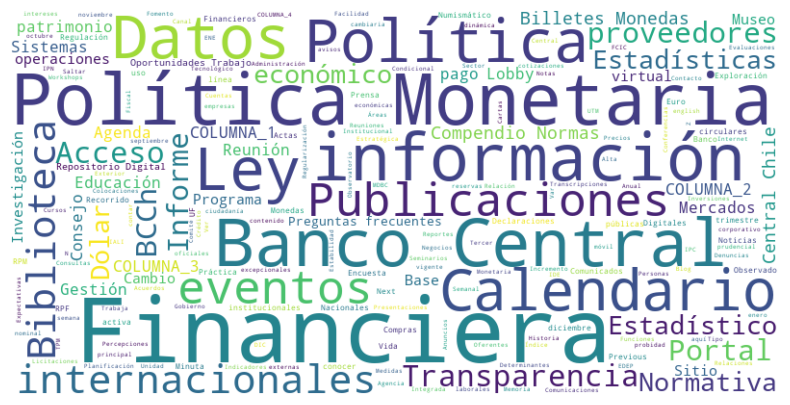

In [9]:
import nltk
from nltk.corpus import stopwords

# Descargar la lista de stopwords de NLTK
nltk.download('stopwords')

# Cargar las stopwords en español 
stop_words = set(stopwords.words('spanish'))

# Filtrar las stopwords de tu texto
filtered_text = ' '.join(word for word in links_text.split() if word.lower() not in stop_words)

# Ahora, generar la nube de palabras usando el texto filtrado
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


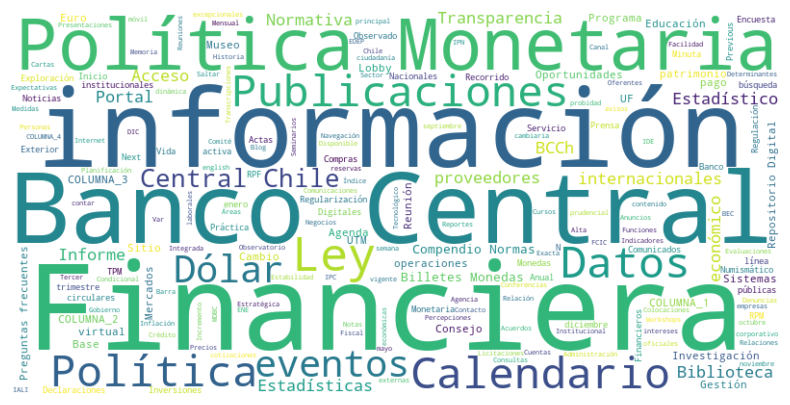

In [10]:

# URL de la página del Banco Central
url = "https://www.bcentral.cl/"  # Cambia por la URL específica si es necesario

# Realizar solicitud HTTP
res = requests.get(url)

# Analizar el HTML con BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

# Extraer texto de la página
page_text = soup.get_text(separator=' ')  # Extrae todo el texto visible en la página

# Cargar tus stopwords personalizadas desde un archivo
with open('stopwords-es.txt', 'r', encoding='utf-8') as f:
    custom_stop_words = set(f.read().splitlines())  # Crear un set de stopwords

# Filtrar las stopwords del texto extraído
filtered_text = ' '.join(word for word in page_text.split() if word.lower() not in custom_stop_words)

# Generar la nube de palabras usando el texto filtrado
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
